# The Deutsch Jozsa Algorithm

First introduced by David Deutsch and Richard Jozsa in 1992, the Deutsch-Jozsa algorithm is a deterministic quantum algorithm.  Although its has very little practical use, the algorithm was one of the first examples of a quantum algorithm that is significantly faster than any given classical algorithm applied to the same problem.

## Problem Statement

We are given a hidden Boolean function $f$, also called an *Oracle*, which takes a string of bits as an input and returns either 0 or 1.  That is,
$$
f(\lbrace x_0, x_1, x_2, ..., x_n \rbrace) \rightarrow 0 \; or \; 1.
$$
Furthermore, we are told that the function is either a **constant** function that returns the same output (0 or 1) for any given binary input or a **balanced** function that returns the 0 and 1 for exactly half of the inputs each.  The goal of the problem, then, is to determine whether the function is **constant** or **balanaced** with as few calculations as possible.

## Classical Solution

Consider the problem in the case where $n=3$.  This means our inputs are, 

$$
\begin{aligned}
f(\lbrace 0,0,0 \rbrace) & \rightarrow ?, \\
f(\lbrace 1,0,0 \rbrace) & \rightarrow ?, \\
f(\lbrace 0,1,0 \rbrace) & \rightarrow ?, \\
f(\lbrace 1,1,0 \rbrace) & \rightarrow ?, \\
f(\lbrace 0,0,1 \rbrace) & \rightarrow ?, \\
f(\lbrace 1,0,1 \rbrace) & \rightarrow ?, \\
f(\lbrace 0,1,1 \rbrace) & \rightarrow ?, \\
f(\lbrace 1,1,1 \rbrace) & \rightarrow ?. \\
\end{aligned}
$$

To determine whether this function is **constant** or **balanaced** we must evaluate the function for the given inputs.  The best case scenario occurs when the first two evaluations return different values,

$$
\begin{aligned}
f(\lbrace 0,0,0 \rbrace) & \rightarrow 0, \\
f(\lbrace 1,0,0 \rbrace) & \rightarrow 1, \\
\end{aligned}
$$

or vice versa, implying the function is **balanced**.  However, if the function is **constant**, half of the inputs plus one, or $2^{n-1}+1$, must be evaluated to verify the function type,

$$
\begin{aligned}
f(\lbrace 0,0,0 \rbrace) & \rightarrow 0, \\
f(\lbrace 1,0,0 \rbrace) & \rightarrow 0, \\
f(\lbrace 0,1,0 \rbrace) & \rightarrow 0, \\
f(\lbrace 1,1,0 \rbrace) & \rightarrow 0, \\
f(\lbrace 0,0,1 \rbrace) & \rightarrow 0, \\
f(\lbrace 1,0,1 \rbrace) & \rightarrow ?, \\
f(\lbrace 0,1,1 \rbrace) & \rightarrow ?, \\
f(\lbrace 1,1,1 \rbrace) & \rightarrow ?. \\
\end{aligned}
$$
Probablistically, it is unlikely that if $2^{n-1}$ evaluations all return 0, the $2^{n-1}+1$th evaluation will be 1.  The probability that the function is constant as a function of number of evaluations $k$ can be described by the equation,

$$
P_{constant}(k) = 1 - \frac{1}{2^{k-1}} \;\; \text{for} \; 1 < k < 2^{n-1}
$$

We can therefore trunctate the number of evaluations used by the algorithm to get a determination with some reasonable percent confidence, but to obtain a determination with 100% confidence, it is required that $k=2^{n-1}+1$.


## Quantum Solution

Using the Deutsch-Josza algorithm, a determination can be made with 100% confidence after only one evaluation of the oracle function $f(x)$.  The general form of the algorithm is as follows,

1. Prepare two quantum registers. The first is an  n-qubit register initialised to $|0\rangle$, and the second is a one-qubit register initialised to $|1\rangle$:
$$
|\psi_0 \rangle = |0\rangle^{\otimes n} |1\rangle
$$


2. Apply a Hadamard gate to each qubit:
$$
|\psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum^{2^n -1}_{x=0} |x\rangle (|0\rangle - |1\rangle)
$$


3. Apple the quantum oracle $|x\rangle |y\rangle$ to $|x\rangle |y \oplus f(x)\rangle$:\
$$
\begin{aligned}
|\psi_2 \rangle &= \frac{1}{\sqrt{2^{n+1}}} \sum^{2^n -1}_{x=0} |x\rangle (|f(x)\rangle - |1 \oplus f(x)\rangle) \\
&= \frac{1}{\sqrt{2^{n+1}}} \sum^{2^n -1}_{x=0} (-1)^{f(x)} |x\rangle (|0\rangle - |1\rangle)
\end{aligned}
$$\
since for each $x$, $f(x)$ is either 0 or 1.


4. Ignore the second single qubit register and apple Hadamard gate to each qubit in the first register:\
$$
\begin{aligned}
|\psi_3 \rangle &= \frac{1}{2^{n}} \sum^{2^n -1}_{x=0} (-1)^{f(x)} \left[ \sum^{2^n -1}_{y=0} (-1)^{x \cdot y} |y\rangle \right] \\
&= \frac{1}{2^{n}} \sum^{2^n -1}_{y=0} \left[ \sum^{2^n -1}_{x=0}  (-1)^{f(x)} (-1)^{x \cdot y} \right] |y\rangle
\end{aligned}
$$\
where $x \cdot y = x_0 y_0 \oplus x_1 y_1 \oplus ... \oplus x_{n-1} y_{n-1}$ is the sum of the bitwise product.


5. Measure the first register.  The probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to 1 if $f(x)$ is constant and 0 if $f(x)$ is balanced.

The algorithm can be more easily visualized with the quantum ciruit shown below.

<img src="Images/General_DJ_3.png" alt="DJ_General" width="600"/>



## Double Slit Analogy


<img src="Images/DoubleSlit.png" alt="DoubleSlit" width="400"/>


To understand why this algorithm works, we can look at a classic quantum experiment, the double slit experiment.  As shown above, a particle with wave-like properties can travel two or more paths from the source simultaneously.  The probability of observing a particle will be concentrated at those detectors where most of the incoming waves arrive with the same phase.  More specifically, imagine that we have $2^n$ detectors and $2^n$ possible paths from the source to each of the detectors.  The paths will be labeled with the n-bit strings $x$ and the detectors with the n-bit strings $y$.

The phase accumulated along a path $x$ to a detector $y$ can be described by the function,

$$
C (-1)^{f(x) + x \cdot y},
$$

where $C$ is a normalization constant.  The probability of observing a particle at detector $y$ can be calculated by summing the amplitudes of all possible paths $x$ leading to detector $y$ and taking the absolute value squared,

$$
P(y) = | \sum_{x} C (-1)^{f(x) + x \cdot y} |^2
$$

To obtain the normalization constant, we sum the probability for all possibly detectors $y$ and set that equal to 1, as the probability of observing the particle at any detector must be 1,

$$
\sum_y P(y) = \sum_y | \sum_{x} C (-1)^{f(x) + x \cdot y} |^2 = 1.
$$

Therefore, the normalization constant is given by $C=2^{-n}$.

Let us now consider the probability of observing a particle at the detector $y=0^n$ (a string of all zeroes).  Plugging $y$ into the probability function, we obtain,

$$
P(0^n) = | 2^{-n} \sum_{x} (-1)^{f(x)} |^2.
$$

In the case that the oracle function $f(x)$ is constant, i.e. $f(x)=c$ , the equation simplifies to,

$$
P(0^n) = | (-1)^{c} |^2,
$$

and we get $P(0^n) = 1$. However, if the oracle function $f(x)$ is a balanced function, all of the terms in the sum over $x$ cancel each other out and we get $P(0^n) = 0$.  Thus, we can determine whether the oracle function is constant or balanced by running this experiment just once.


## Implementation

We can use Qiskit to build and test various quantum circuits.

In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import BasicAer, execute
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [36]:
nshots = 5000

### Constant Circuit

The simplest constant oracle is: 

1. if $f(x) = 0$, then apply the $I$ gate to the qubit in register 2,
2. if $f(x) = 1$, then apply the $X$ gate to the qubit in register 2.


In [43]:
qreg_c = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit_c = QuantumCircuit(qreg_c, creg_c)

circuit_c.reset(qreg_c[0])
circuit_c.reset(qreg_c[1])
circuit_c.reset(qreg_c[2])
circuit_c.h(qreg_c[0])
circuit_c.h(qreg_c[1])
circuit_c.h(qreg_c[2])
circuit_c.x(qreg_c[3])
circuit_c.h(qreg_c[3])

circuit_c.barrier()
circuit_c.barrier()

circuit_c.h(qreg_c[0])
circuit_c.h(qreg_c[1])
circuit_c.h(qreg_c[2])
circuit_c.measure(qreg_c[0], creg_c[0])
circuit_c.measure(qreg_c[1], creg_c[1])
circuit_c.measure(qreg_c[2], creg_c[2])

circuit_c.draw()

┌───┐ ░  ░ ┌───┐┌─┐      
q_0: ─|0>─┤ H ├─░──░─┤ H ├┤M├──────
          ├───┤ ░  ░ ├───┤└╥┘┌─┐   
q_1: ─|0>─┤ H ├─░──░─┤ H ├─╫─┤M├───
          ├───┤ ░  ░ ├───┤ ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├─░──░─┤ H ├─╫──╫─┤M├
     ┌───┐├───┤ ░  ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──░───────╫──╫──╫─
     └───┘└───┘ ░  ░       ║  ║  ║ 
c: 4/══════════════════════╩══╩══╩═
                           0  1  2


Total count for 00 and 11 are: {'0000': 5000}


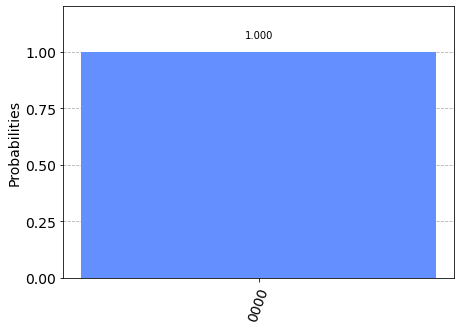

In [44]:
# Use Aer's qasm_simulator
simulator_c = QasmSimulator()

# transpile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit_c = transpile(circuit_c, simulator_c)

# Execute the circuit on the qasm simulator
job_c = simulator_c.run(compiled_circuit_c, shots=nshots)

# Grab results from the job
result_c = job_c.result()

# Returns counts
counts_c = result_c.get_counts(circuit_c)
print("\nTotal count for 00 and 11 are:",counts_c)

# Plot a histogram
plot_histogram(counts_c)

#### Comments 

As we expected, with the constant oracle inside the Deutsch-Josza algorithm the probability of measuring the input bit string is 100%.  

### Balanced Circuit

Building a balanced circuit is more difficult.  We can create a balanced oracle by performing CNOTs with each input as the control and the output but as the target.  If desired, to change the binary input we can wrap the qubits in X-gates.

In [58]:
qreg_b = QuantumRegister(4, 'q')
creg_b = ClassicalRegister(4, 'c')
circuit_b = QuantumCircuit(qreg_b, creg_b)

circuit_b.h(qreg_b[0])
circuit_b.h(qreg_b[1])
circuit_b.h(qreg_b[2])
circuit_b.x(qreg_b[3])

circuit_b.h(qreg_b[3])

circuit_b.barrier()

#circuit_b.x(qreg_b[0])
#circuit_b.x(qreg_b[2])
circuit_b.cx(qreg_b[0],qreg_b[3])
circuit_b.cx(qreg_b[1],qreg_b[3])
circuit_b.cx(qreg_b[2],qreg_b[3])
#circuit_b.x(qreg_b[0])
#circuit_b.x(qreg_b[2])

circuit_b.barrier()

circuit_b.h(qreg_b[1])
circuit_b.h(qreg_b[0])
circuit_b.h(qreg_b[2])

circuit_b.measure(qreg_b[0], creg_b[0])
circuit_b.measure(qreg_b[1], creg_b[1])
circuit_b.measure(qreg_b[2], creg_b[2])


circuit_b.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 4/═════════════════════════════════════╩══╩══╩═
                                          0  1  2


Total count for 00 and 11 are: {'0111': 5000}


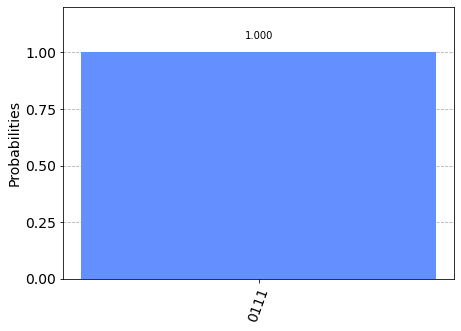

In [56]:
# Use Aer's qasm_simulator
simulator_b = QasmSimulator()

# transpile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
# https://en.wikipedia.org/wiki/Source-to-source_compiler
compiled_circuit_b = transpile(circuit_b, simulator_b)

# Execute the circuit on the qasm simulator
job_b = simulator_b.run(compiled_circuit_b, shots=nshots)

# Grab results from the job
result_b = job_b.result()

# Returns counts
counts_b = result_b.get_counts(circuit_b)
print("\nTotal count for 00 and 11 are:",counts_b)

# Plot a histogram
plot_histogram(counts_b)

### Comments

Applying the Deutsch-Josza algorithm to a balanced oracle now returns a 0% chance of measuring the input zero state $|0,0,...,0\rangle$.  Additionally, several different input strings (1,0,1), (0,0,1), etc. were tested and all produced the same result.  Therefore, we have shown that the Deutsch-Josza algorithm can determine the function type of a given oracle in just one iteration.

### References

[1] David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558. doi:10.1098/rspa.1992.0167.

[2] https://quantum-computing.ibm.com/composer/docs/iqx/guide/deutsch-jozsa-algorithm

[3] https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html